<a href="https://colab.research.google.com/github/Syarafina-Dewi/data-analytics/blob/main/Topic_14_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis data eksploratif (EDA) antar variabel**

In [ ]:
# import package
import pandas as pd

# connect to google drve
from google.colab import drive
drive.mount('/content/gdrive')

# importing the dataset
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/Data/Mall_Customers.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# display the top 5 data
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# checks data type and checks for null on all variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# check the total missing value
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# display statistical results
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# import library for visualization
import seaborn as sns

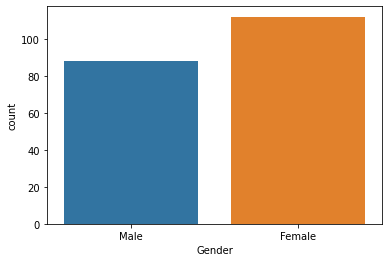

In [ ]:
# visualization of gender variables, using countplot
sns.countplot(data=dataset,x="Gender")

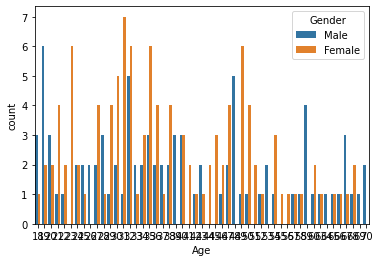

In [ ]:
# visualization of the age variable against the gender variable using a countplot
sns.countplot(data=dataset,x="Age",hue="Gender")

In [ ]:
# get dummy data to transform data
dataset2=pd.get_dummies(dataset,drop_first=True)

In [ ]:
# display the correlations and sort them from smallest to largest
dataset3=dataset2.corr()['Gender_Male'].sort_values().reset_index()

dataset3

,index,Gender_Male
0,Spending Score (1-100),-0.058109
1,Annual Income (k$),0.056410
2,CustomerID,0.057400
3,Age,0.060867
4,Gender_Male,1.000000


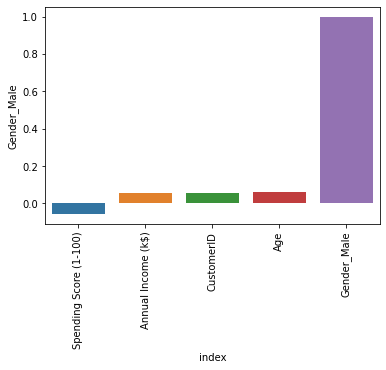

In [ ]:
# visualization of index against Gender_Male with barplot
chart = sns.barplot(data=dataset3,x="index",y="Gender_Male")

for item in chart.get_xticklabels():
  item.set_rotation(90)

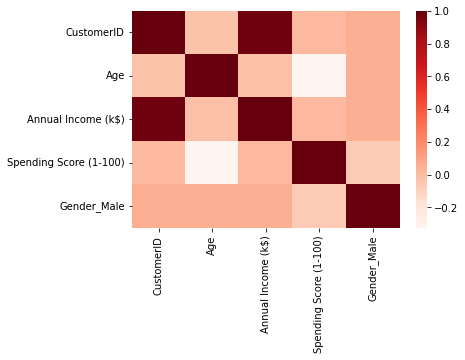

In [ ]:
# heatmap to visualize the correlation
sns.heatmap(dataset2.corr(),cmap="Reds")

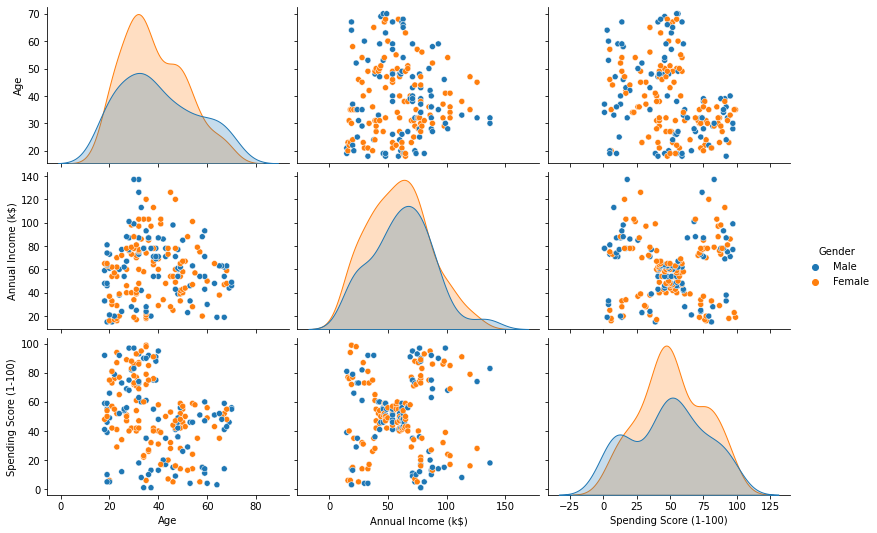

In [ ]:
# import package for visualization
import matplotlib.pyplot as plt

# visualization of the relationship between variables with respect to gender with a pairplot, except CustomerId
X = dataset.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

# **K-Means Clustering**

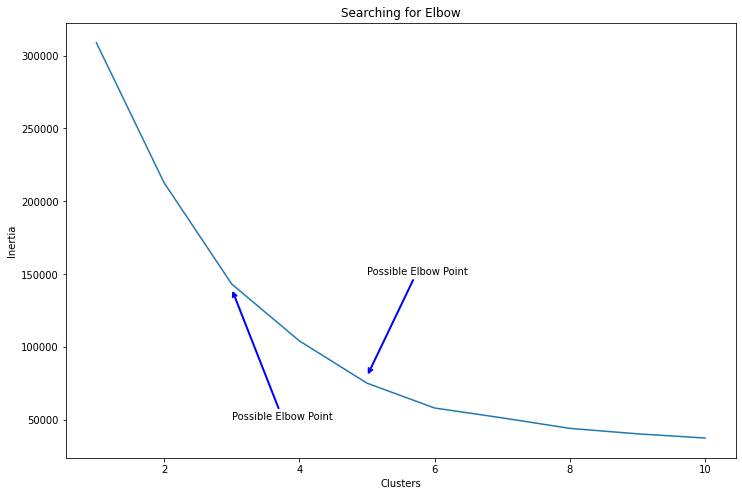

In [ ]:
# import library
from sklearn.cluster import KMeans

# clustering function
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)

# to give title and label
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# annotate
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


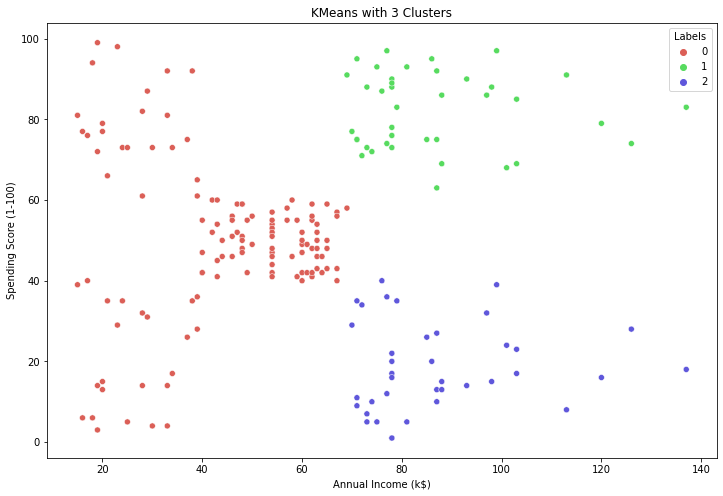

In [ ]:
# K-means clustering with 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

# give the label
X['Labels'] = km3.labels_

# figure size
plt.figure(figsize=(12, 8))

# variable scatterplot with different label colors
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))

# give the title
plt.title('KMeans with 3 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


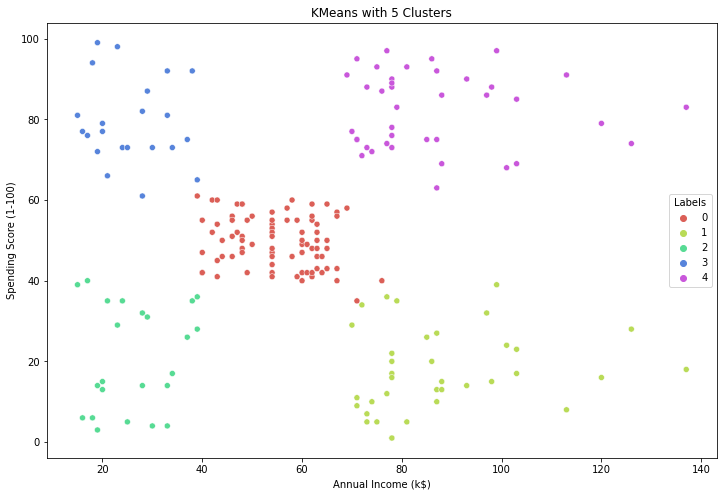

In [ ]:
# K-means clustering with 5 Cluster
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

**Explanation**

From the two experiments above, it can be seen that using 5 clusters is better than 3 clusters. The results of the 5 clusters are as follows.

Label 0 is low income and low expenses

Label 1 is high income and high expenses

Label 2 is middle income and middle expenses

Label 3 is high income and low expenses

Label 4 is low income and high expenses

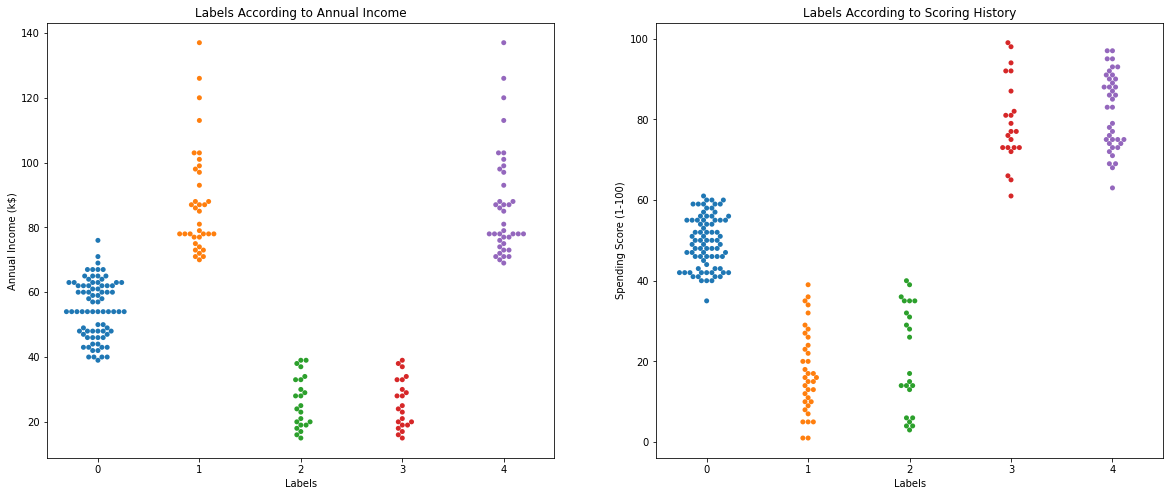

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income (k$)', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score (1-100)', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

# **Evaluation Metrics**

In [ ]:
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


def base_models():
    svc = SVC()
    lsvc = LinearSVC()
    tree = DecisionTreeClassifier()
    nb = GaussianNB()
    logr = LogisticRegression()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    knn = KNeighborsClassifier()
    nn = MLPClassifier()
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    xgb = XGBClassifier()
    lgb = LGBMClassifier()
    et  = ExtraTreesClassifier()
    models={"svc":svc,"lsvc":lsvc,"tree":tree,"nb":nb,"logr":logr,"rf":rf,"gb":gb,"knn":knn,
       "nn":nn,"lda":lda,"qda":qda,"xgb":xgb,"et":et,"lgb":lgb}
    return models

In [ ]:
#cross validation
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

predictors = dataset.drop("Gender",axis=1)
response = le.fit_transform(dataset["Gender"])

models_name = ["svc","lsvc","tree","nb","logr","rf","gb","knn",
       "nn","lda","qda","xgb","et","lgb"]
for model in models_name:
    hasil_cv = cross_validate(X=predictors,y=response,
                          estimator=base_models()[model], cv=10,
                          scoring=('accuracy', 'recall',"roc_auc","f1"))
    if(model !="svc"):
        score_cv = pd.DataFrame.from_dict(hasil_cv).mean().to_frame().T
        score_cv_fin = pd.concat([score_cv_fin,score_cv])
    else:
        score_cv_fin = pd.DataFrame.from_dict(hasil_cv).mean().to_frame().T

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
score_cv_fin.insert(0,"models_name",models_name,True)

In [ ]:
score_cv_fin

,models_name,fit_time,score_time,test_accuracy,test_recall,test_roc_auc,test_f1
0,svc,0.003866,0.005978,0.575,0.129167,0.496149,0.168151
0,lsvc,0.009863,0.005791,0.525,0.311111,0.390404,0.211520
0,tree,0.002554,0.005133,0.460,0.398611,0.452336,0.356269
0,nb,0.002120,0.005217,0.585,0.395833,0.611742,0.425798
0,logr,0.013762,0.006919,0.530,0.120833,0.487973,0.123922
0,rf,0.174889,0.031173,0.450,0.369444,0.422506,0.363637
0,gb,0.083747,0.007046,0.495,0.412500,0.461569,0.401868
0,knn,0.002446,0.008554,0.380,0.336111,0.352178,0.287141
0,nn,0.276419,0.012709,0.510,0.363889,0.485890,0.379064
0,lda,0.007045,0.012103,0.535,0.109722,0.498138,0.109394
